In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

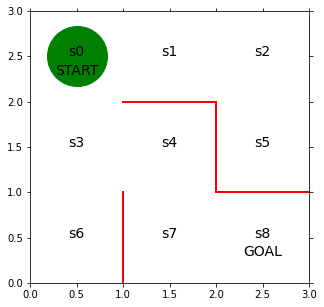

In [2]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# red wall
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# state
plt.text(0.5, 2.3, 'START', size=14, ha='center')
plt.text(0.5, 2.5, 's0', size=14, ha='center')
plt.text(1.5, 2.5, 's1', size=14, ha='center')
plt.text(2.5, 2.5, 's2', size=14, ha='center')
plt.text(0.5, 1.5, 's3', size=14, ha='center')
plt.text(1.5, 1.5, 's4', size=14, ha='center')
plt.text(2.5, 1.5, 's5', size=14, ha='center')
plt.text(0.5, 0.5, 's6', size=14, ha='center')
plt.text(1.5, 0.5, 's7', size=14, ha='center')
plt.text(2.5, 0.5, 's8', size=14, ha='center')
plt.text(2.5, 0.3, 'GOAL', size=14, ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

# agent
line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)

初期方策のパラメータ：行は状態，列は移動方向↑，→，↓，←

In [3]:
# parameters of an initial policy : theta_0

theta_0 = np.array([[np.nan, 1, 1, np.nan], #s0
                    [np.nan, 1, np.nan, 1], #s1
                    [np.nan, np.nan, 1, 1], #s2
                    [1, 1, 1, np.nan], #s3
                    [np.nan, np.nan, 1, 1], # s4
                    [1, np.nan, np.nan, np.nan], #s5
                    [1, np.nan, np.nan, np.nan], #s6
                    [1, 1, np.nan, np.nan], #s7 #s8 is a goal
                   ])

In [4]:
[a, b] = theta_0.shape
Q = np.random.rand(a,b) * theta_0 * 0.1

In [5]:
# convert theta to policy pi

def simple_convert_into_pi_from_theta(theta):
    # simple ratio
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
    
    pi = np.nan_to_num(pi)
    
    return pi

pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [6]:
# epsilon-greedy

def get_action(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    
    # select action
    if np.random.rand() < epsilon:
        # random exploration
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]
        
    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3
        
    return action

def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a]
     
    if next_direction == 'up':
        s_next = s - 3
    elif next_direction == 'right':
        s_next = s + 1
    elif next_direction == 'down':
        s_next = s + 3
    elif next_direction == 'left':
        s_next = s - 1
        
    return s_next

In [7]:
def Q_learning(s, a, r, s_next, a_next, Q, eta, gamma):
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r -Q[s, a])
        
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next, :]) -Q[s, a])
        
    return Q

In [8]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]
    
    while (1):
        a = a_next
        
        s_a_history[-1][1] = a
        s_next = get_s_next(s, a, Q, epsilon, pi)
        
        s_a_history.append([s_next, np.nan])
        
        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
            
        Q = Q_learning(s, a, r, s_next, a_next, Q, eta, gamma)
        
        if s_next == 8:
            break
        else:
            s = s_next
            
    return [s_a_history, Q]

In [9]:
eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanargmax(Q, axis=1)
is_continue = True
episode = 1

V = []
V.append(np.nanmax(Q, axis=1))

while is_continue:
    print("episode:" + str(episode))
    
    epsilon = epsilon / 2
    
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    
    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v - v))) # state-value
    v = new_v
    V.append(v)
    
    print("Elapsed steps were " + str(len(s_a_history) - 1) + "steps")
    
    episode = episode + 1
    if  episode > 100:
        break

episode:1
10.84698240443335
Elapsed steps were 182steps
episode:2
0.1332561220706923
Elapsed steps were 110steps
episode:3
0.18773354458311203
Elapsed steps were 236steps
episode:4
0.14692378223301694
Elapsed steps were 94steps
episode:5
0.1412849979018505
Elapsed steps were 198steps
episode:6
0.09202717516153835
Elapsed steps were 4steps
episode:7
0.09109511724897389
Elapsed steps were 4steps
episode:8
0.09013531184926837
Elapsed steps were 4steps
episode:9
0.08913501820485122
Elapsed steps were 4steps
episode:10
0.0880827822245428
Elapsed steps were 4steps
episode:11
0.086968890458192
Elapsed steps were 4steps
episode:12
0.08578561901925408
Elapsed steps were 4steps
episode:13
0.08452732836506568
Elapsed steps were 4steps
episode:14
0.083190444839227
Elapsed steps were 4steps
episode:15
0.08177336159752294
Elapsed steps were 4steps
episode:16
0.08027628470643852
Elapsed steps were 4steps
episode:17
0.07870104459008345
Elapsed steps were 4steps
episode:18
0.0770508884103691
Elapsed st

In [10]:
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm # colormap

def init():
    line.set_data([], [])
    return (line, )

def animate(i):
    line, = ax.plot([0.5], [2.5], marker="s", color=cm.jet(V[i][0]), markersize=85)
    line, = ax.plot([1.5], [2.5], marker="s", color=cm.jet(V[i][1]), markersize=85)
    line, = ax.plot([2.5], [2.5], marker="s", color=cm.jet(V[i][2]), markersize=85)
    line, = ax.plot([0.5], [1.5], marker="s", color=cm.jet(V[i][3]), markersize=85)
    line, = ax.plot([1.5], [1.5], marker="s", color=cm.jet(V[i][4]), markersize=85)
    line, = ax.plot([2.5], [1.5], marker="s", color=cm.jet(V[i][5]), markersize=85)
    line, = ax.plot([0.5], [0.5], marker="s", color=cm.jet(V[i][6]), markersize=85)
    line, = ax.plot([1.5], [0.5], marker="s", color=cm.jet(V[i][7]), markersize=85)
    line, = ax.plot([2.5], [0.5], marker="s", color=cm.jet(1, 0), markersize=85)
    
    return(line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames = len(V), interval=200, repeat=False)

HTML(anim.to_jshtml())